In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
smart_df = pd.read_csv('unclean_smartwatch_health_data.csv')

In [44]:
class watch_analysis:
    """
       Initialize class with dataframe
    """
    
    def __init__(self,file_path):
        self.watch_data = pd.read_csv(file_path)
    """
        Displays dataset 
    """
    def Dataframe(self):
        return self.watch_data
        
    """ 
       Information of the dataset
    """
    def Basic_info(self):
        return self.watch_data.info()

    """ 
       rows and columns count
    """
    def Count_of_rows_columns(self):
        return self.watch_data.shape

    """ 
       Indexing 
    """
    def indexing(self):
        return self.watch_data.index
    """ 
       Checking null values
    """
    def null_value_sum(self):
        return self.watch_data.isnull().sum()
    """
       checking for duplicates
    """
    def checking_duplicates(self):
        return self.watch_data.duplicated().sum()
    def avg_heartrate(self):
        return self.watch_data['Heart Rate (BPM)'].mean()
    def highest_heartrate(self):
        return watch_data.sort_values(by = 'Heart Rate (BPM)',ascending = False)[['User ID','Activity Level']].reset_index()
    def min_blood_oxygen_level(self):
        return self.watch_data['Blood Oxygen Level (%)'].min()
    def max_blood_oxygen_level(self):
        return self.watch_data['Blood Oxygen Level (%)'].max()
    def higest_step_count(self):
        return self.watch_data.sort_values(by = 'Step Count' , ascending = False).head()
    def unique_activity_levels(self):
        return self.watch_data['Activity Level'].value_counts()
    def common_activity(self):
        return self.watch_data['Activity Level'].value_counts().head(1)
    def avg_heart_rate_each_activity(self):
        return self.watch_data.groupby('Activity Level')['Heart Rate (BPM)'].mean()
    def avg_sleep_different_stress_levels(self):
        self.watch_data['Sleep Duration (hours)'] = pd.to_numeric(       
        self.watch_data['Sleep Duration (hours)'], errors='coerce'
    )
        return self.watch_data.groupby('Stress Level')['Sleep Duration (hours)'].mean()
    def compare_oxygen_high_low_stress(self):
        self.watch_data['Stress Level'] = pd.to_numeric(self.watch_data['Stress Level'], errors='coerce')
        self.watch_data['Blood Oxygen Level (%)'] = pd.to_numeric(self.watch_data['Blood Oxygen Level (%)'], errors='coerce')
        high_stress = self.watch_data[self.watch_data['Stress Level'] > 7]
        low_stress = self.watch_data[self.watch_data['Stress Level'] < 4]
        high_avg = high_stress['Blood Oxygen Level (%)'].mean()
        low_avg = low_stress['Blood Oxygen Level (%)'].mean()
        return {
        'High Stress Avg Oxygen': high_avg,
        'Low Stress Avg Oxygen': low_avg
    }
    def avg_sleep_rate(self):
        low_sleep = smart_df[smart_df['Sleep Duration (hours)'] < 6]['Heart Rate (BPM)'].mean()
        high_sleep = smart_df[smart_df['Sleep Duration (hours)'] > 8]['Heart Rate (BPM)'].mean()
        return {
            'Low_sleep_hr:',low_sleep,
            'High_sleep_hr:',high_sleep
        }
    def avg_steep_count(self):
        low_sleep_hr = smart_df[smart_df['Sleep Duration (hours)']<6]['Step Count'].mean()
        medium_sleep_hr = smart_df[(smart_df['Sleep Duration (hours)'] > 6) & (smart_df['Sleep Duration (hours)'] < 8)]['Step Count'].mean()
        high_sleep_hr = smart_df[smart_df['Sleep Duration (hours)']>8]['Step Count'].mean()
        return [low_sleep_hr,medium_sleep_hr,high_sleep_hr]
    def Activity_Level_count(self):
        Activity_Level_count = 	smart_df['Activity Level'].value_counts()
        plt.pie(Activity_Level_count, labels=Activity_Level_count.index, autopct='%4.4f%%', startangle=90)
        plt.title('Distribution of Activity Level')
        plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
        return plt.show()
    def Stress_Level_counts(self):
        Stress_Level_counts = smart_df['Stress Level'].value_counts()
        plt.figure(figsize=(11, 4))
        plt.bar(Stress_Level_counts.index,Stress_Level_counts.values,color = ['skyblue','orange','lightgreen','salmon'])
    def relation_btw_RT_BOL(self):
        return sns.scatterplot(data = smart_df,x = 'Heart Rate (BPM)',y = 'Blood Oxygen Level (%)')

    """
       outliners
    """
    def Outliers(self, col):
        Q1 = self.watch_data[col].quantile(0.25)
        Q3 = self.watch_data[col].quantile(0.75)
        IQR = Q3 - Q1 # inter quartile range
    
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        outliers = self.watch_data[(self.watch_data[col] < lower_bound) | (self.watch_data[col] > upper_bound)]
        print(f"Lower Bound: {lower_bound}")
        print(f"Upper Bound: {upper_bound}")
        print(f"Number of outliers: {len(outliers)}")
        return

In [45]:
obj_venkat = watch_analysis('unclean_smartwatch_health_data.csv')

In [46]:
obj_venkat.Dataframe()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


In [31]:
obj_venkat.Basic_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [32]:
obj_venkat.Count_of_rows_columns()

(10000, 7)

In [33]:
obj_venkat.indexing()

RangeIndex(start=0, stop=10000, step=1)

In [34]:
obj_venkat.null_value_sum()

User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

In [35]:
obj_venkat.checking_duplicates()

np.int64(0)

In [36]:
obj_venkat.avg_heartrate()

np.float64(76.03546175646017)

In [37]:
obj_venkat.min_blood_oxygen_level()

np.float64(90.79120814564097)

In [38]:
obj_venkat.max_blood_oxygen_level()

np.float64(100.0)

In [39]:
obj_venkat.higest_step_count()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
4018,1636.0,85.356366,95.728989,62486.690753,7.269465770104995,Sedentary,1
7967,3077.0,65.917239,98.585765,62040.990907,5.579157298034869,Actve,8
3641,4852.0,73.333370,98.753291,61299.413196,6.692177630616374,Active,7
540,1399.0,89.969165,97.831652,60278.379672,8.382668397997998,Actve,6
1125,3231.0,69.317933,97.586680,57034.626395,6.603507686732334,Sedentary,5


In [40]:
obj_venkat.unique_activity_levels()

Activity Level
Seddentary       1676
Sedentary        1657
Highly Active    1650
Active           1643
Actve            1622
Highly_Active    1552
Name: count, dtype: int64

In [41]:
 smart_df['Sleep Duration (hours)'] = pd.to_numeric(smart_df['Sleep Duration (hours)'], errors='coerce') #used to convert from word to value

In [42]:
smart_df['Activity Level'].value_counts().head(1)

Activity Level
Seddentary    1676
Name: count, dtype: int64

In [25]:
obj_venkat.common_activity()

Activity Level
Seddentary    1676
Name: count, dtype: int64

In [26]:
obj_venkat.avg_heart_rate_each_activity()

Activity Level
Active           76.037389
Actve            75.903038
Highly Active    76.217573
Highly_Active    75.962609
Seddentary       75.640778
Sedentary        76.427573
Name: Heart Rate (BPM), dtype: float64

In [27]:
obj_venkat.avg_sleep_different_stress_levels()

Stress Level
1            6.544879
10           6.554654
2            6.515773
3            6.483722
4            6.428832
5            6.517283
6            6.495143
7            6.523756
8            6.474043
9            6.512552
Very High    6.163956
Name: Sleep Duration (hours), dtype: float64

In [28]:
obj_venkat.compare_oxygen_high_low_stress()

{'High Stress Avg Oxygen': np.float64(97.84073573074393),
 'Low Stress Avg Oxygen': np.float64(97.88649697236035)}

In [403]:
obj_venkat.avg_sleep_rate()

{np.float64(76.05159672727046),
 np.float64(76.0535227400146),
 'High_sleep_hr:',
 'Low_sleep_hr:'}

In [405]:
obj_venkat.avg_steep_count()

[np.float64(6929.49309992204),
 np.float64(7020.937446312604),
 np.float64(7029.802700800042)]

In [47]:
obj_venkat.Outliers('Heart Rate (BPM)')


Lower Bound: 34.4280059374523
Upper Bound: 115.66039470134476
Number of outliers: 75


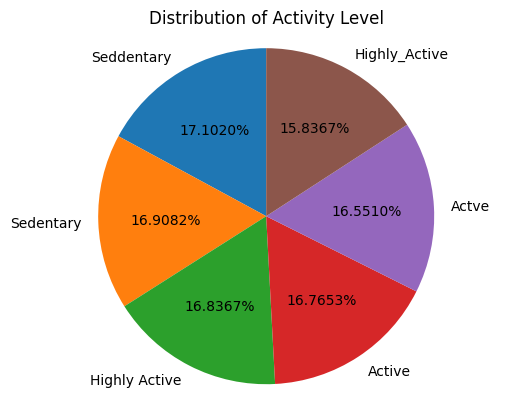

In [429]:
obj_venkat.Activity_Level_count()

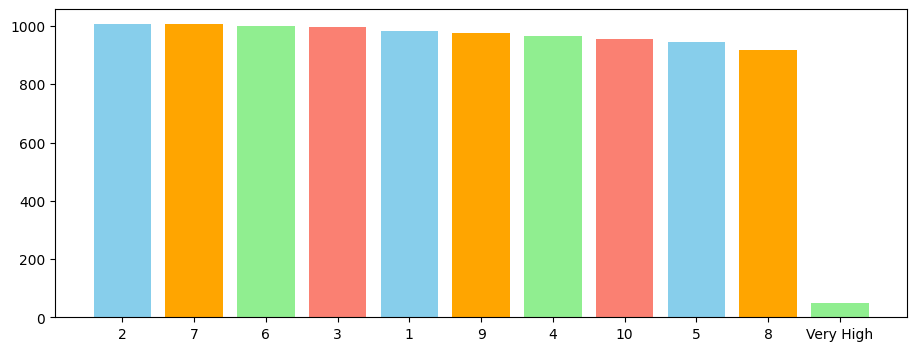

In [434]:
obj_venkat.Stress_Level_counts()

<Axes: xlabel='Heart Rate (BPM)', ylabel='Blood Oxygen Level (%)'>

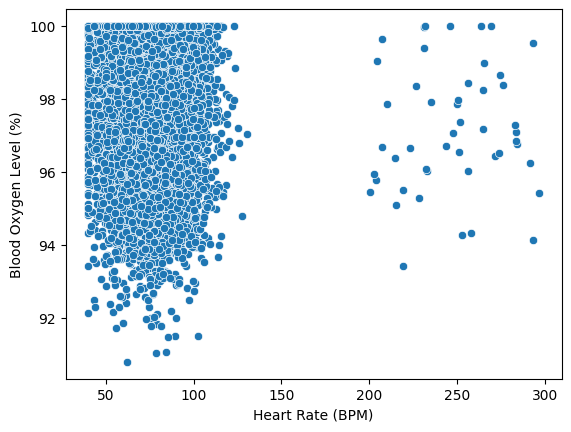

In [448]:
obj_venkat.relation_btw_RT_BOL()

In [ ]:
#heatmap

In [449]:
r=smart_df[smart_df['Blood Oxygen Level (%)']>92]
r

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


In [450]:
smart_df.describe()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count
count,9799.000000,9600.000000,9700.000000,9900.000000
mean,3007.480253,76.035462,97.841581,6985.685885
std,1150.581542,19.412483,1.732863,6885.809680
min,1001.000000,40.000000,90.791208,0.910138
25%,1997.500000,64.890152,96.662683,2021.039657
50%,2998.000000,75.220601,98.010642,4962.534599
75%,4004.000000,85.198249,99.376179,9724.902880
max,4999.000000,296.593970,100.000000,62486.690753


In [451]:
#What is the distribution of blood oxygen levels across users? Are there any users with critically low levels?
bo_level = smart_df.sort_values(by = 'Blood Oxygen Level (%)',ascending=False)
bo_level

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
5010,3342.0,67.281165,100.0,2526.892798,5.452805144681507,Sedentary,1
6414,1898.0,73.202523,100.0,3755.923329,3.4444454808714307,Highly Active,5
6419,3104.0,83.807307,100.0,457.749506,5.838233761488134,Sedentary,6
6424,3607.0,NaN,100.0,3243.230796,5.6977126385168955,Highly_Active,6
1870,NaN,81.002083,100.0,9578.167178,3.849918672105939,Actve,2
...,...,...,...,...,...,...,...
9834,4840.0,64.803112,NaN,1647.308449,8.04238137746177,Highly Active,7
9861,3942.0,57.617790,NaN,14269.737149,6.390686112594759,Highly_Active,9
9885,4028.0,75.281591,NaN,3852.160740,8.970316986352344,Actve,NaN
9905,3603.0,87.693723,NaN,2364.028205,3.5490963940132865,Seddentary,3


In [452]:
# Convert column to numeric
#smart_df['Blood Oxygen Level (%)'] = pd.to_numeric(smart_df['Blood Oxygen Level (%)'], errors='coerce')

Q1 = smart_df['Blood Oxygen Level (%)'].quantile(0.25)
Q3 = smart_df['Blood Oxygen Level (%)'].quantile(0.75)
IQR = Q3 - Q1

low_outliers = smart_df[smart_df['Blood Oxygen Level (%)'] < Q1-1.5*IQR]

low_outliers

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
389,4991.0,89.812696,92.003999,3197.915998,6.867673807383509,NaN,7
548,1833.0,78.880652,92.109389,2274.291267,6.833725883961385,Sedentary,4
773,3914.0,74.337231,92.288167,2482.815316,7.45563119856827,Actve,5
859,2388.0,43.259383,92.482382,994.697587,4.913507114565334,Highly_Active,10
944,3703.0,84.058395,91.062167,9390.095074,4.550439370733248,Active,4
1129,4579.0,72.291005,92.577289,158.463338,8.951708332414036,Active,5
1179,3692.0,89.396977,91.507534,2790.919612,5.617238886873169,Sedentary,8
1778,1395.0,74.038855,92.483740,NaN,5.299209434229295,Seddentary,9
2263,1425.0,43.767314,92.282996,3069.225843,6.116159844828475,Active,1
2316,2265.0,102.533707,91.514026,1015.818664,6.769490710476727,Actve,1
